In [2]:
print("Hello World!") # This is a comment

Hello World!


This is a markdown test \
$f(x) = mx + b$

In [18]:
import numpy as np #import numpy as np
from matplotlib import pyplot as plt #import matplotlib.pyplot as plt


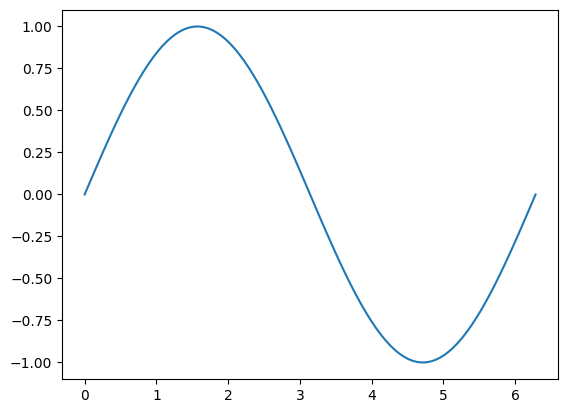

In [14]:
xs = np.linspace(0,2*np.pi,100) # create an array of 100 points between 0 and 2pi (pi = np.pi)
ys = np.sin(xs) # compute the sine of each of those points (np.sin is the sine function)
plt.plot(xs,ys) # plot the points (xs,ys)

In [17]:
rng = np.random.default_rng(0) # create a random number generator with a seed of 0
x = rng.uniform(1.0, 2.0)         # single float in [1,2)
a = rng.uniform(1.0, 2.0, size=5) # 1D array of 5 floats in [1,2)
print(x)
print(a)

1.6369616873214543
[1.26978671 1.04097352 1.01652764 1.81327024 1.91275558]


In [ ]:

rng1 = np.random.default_rng(0) # seed of 0
print(rng1.random(), rng1.integers(1,3))

rng2 = np.random.default_rng(0)  # same seed => same outputs
print(rng2.random(), rng2.integers(1,3))

rng3 = np.random.default_rng()   # no seed => non-deterministic
print(rng3.random(), rng3.integers(1,3))

0.6369616873214543 2
0.6369616873214543 2
0.5113376823297033 1


In [7]:
test_samples = [np.random.uniform() for _ in range(100000)]
print(test_samples[:10]) # print the first 10 samples

[0.0002845492410619155, 0.035249662379080005, 0.0261249785533747, 0.02603332479630449, 0.5848293530769464, 0.42638101361539205, 0.354940531065949, 0.3789277398960268, 0.9523832699723698, 0.0911853603936591]


In [10]:
another_rng = np.random.default_rng() # no seed => non-deterministic
test_samples = [another_rng.uniform(-1, 1) for _ in range(100000)] # call the method on the generator, specify range, and loop 100,000 times
print(test_samples[:10]) # print the first 10 samples

[0.21894970665721947, 0.5129882684122975, -0.3717384936049333, 0.7266085117733785, -0.6790198582820737, -0.9785661784530388, 0.3013963877249908, -0.9775864337454323, 0.5809525691432165, -0.6261786358405559]


2
4
2.0
4.0
1.23e+04
12345.68
Hello Jake, x ≈ 0.667


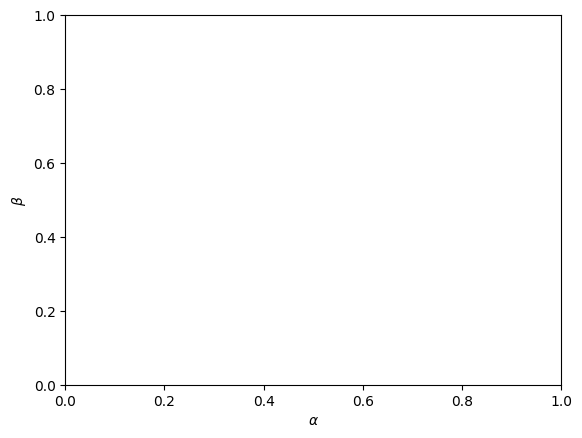

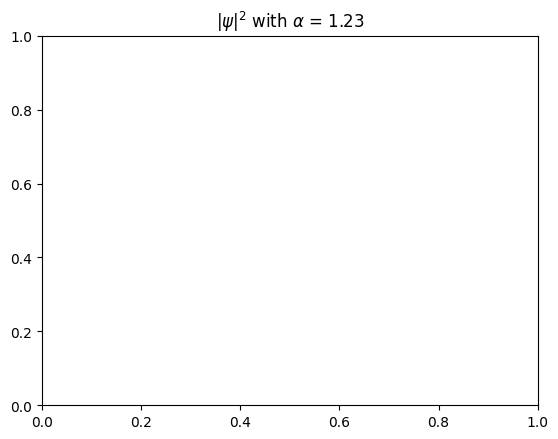

In [54]:
# ========================= Note on Rounding and Formatting =========================

# The built-in round function uses "bankers' rounding" (round half to even)
print(round(2.5))  # Outputs: 2
print(round(3.5))  # Outputs: 4
# NumPy's around function always rounds half away from zero
print(np.around(2.5))  # Outputs: 3.0
print(np.around(3.5))  # Outputs: 4.0

# .e and .f are format specifiers for scientific and fixed-point notation, respectively (the decimals are rounded (banker's) to the specified number of places)
value = 12345.6789
print(f"{value:.2e}")  # Scientific notation with 2 decimal places: 1.23e+04
print(f"{value:.2f}")  # Fixed-point notation with 2 decimal places: 12345.68

# f-strings vs raw strings (r"...") and raw f-strings (rf"...") — quick guide
#
# f"...": interpolate Python expressions inside { } and format with specs.
#   - ROUNDS for display (e.g., :.3f, :.2e), does not change the underlying value.
#   - Examples:
name = "Jake"; x = 2/3
s1 = f"Hello {name}, x ≈ {x:.3f}"          
print(s1) # 'Hello Jake, x ≈ 0.667'
#
# r"...": raw string literal — backslashes are NOT treated as escapes.
#   - Good for LaTeX, regex, Windows paths: r"\alpha\beta" keeps the backslashes (only for rendering in Matplotlib).
#   - No interpolation: { } are literal characters.
#   - Note: a raw string can’t end with a single backslash: r"foo\"  # ❌
latex_str_1 = r"$\alpha$"
latex_str_2 = r"$\beta$"
plt.xlabel(latex_str_1)
plt.ylabel(latex_str_2)
plt.show()

# rf"..."/fr"...": combine BOTH — interpolate AND keep backslashes raw.
#   - Perfect for LaTeX with variables in Matplotlib titles/labels.
#   - Examples:
alpha = 1.2345
title = rf"$|\psi|^2$ with $\alpha$ = {alpha:.2f}"  # LaTeX + formatted value
plt.title(title)
plt.show()

# Tip: If you don’t need interpolation, prefer r"..." for LaTeX.
#      If you do need it, use rf"...". Avoid doubling backslashes when using r/rf.

In [ ]:
# ========================= Broadcasting & Pointwise Ops: Quick Reference =========================
# How array operations work in NumPy:
#
# 1) SAME SHAPE -> POINTWISE
#    If two arrays have exactly the same shape, operations are elementwise (pointwise).
#    Example: (2,3) with (2,3)
#
# 2) DIFFERENT SHAPES -> BROADCASTING (conceptual model)
#    NumPy uses broadcasting to make shapes compatible without copying data.
#    Mental model (no actual data is changed unless you reshape explicitly):
#      Step A) ALIGN TRAILING AXES: Conceptually pad the SHORTER shape with LEADING 1s
#              so both shapes have the same number of axes. (Right-to-left alignment.)
#      Step B) COMPATIBILITY CHECK (right → left): each axis pair is compatible if sizes
#              are equal OR one of them is 1. Otherwise -> ValueError.
#      Step C) RESULT SHAPE: take the per-axis maximum across the aligned shapes.
#      Step D) VIRTUAL DUPLICATION: any operand with size 1 on an axis is *logically*
#              repeated along that axis to the result size (no copy; done via strides).
#
#    IMPORTANT: Implicit padding is ALWAYS on the LEFT (leading axes).
#               Example: (3,) with (2,3,4) is treated as (1,1,3) vs (2,3,4), not (3,1,1).
#
# 3) INSERTING SIZE-1 AXES YOURSELF
#    Use None / np.newaxis to explicitly add size-1 axes wherever you want to control alignment.
#    Example: x[:, None] turns shape (N,) into (N,1); x[None, :] turns (N,) into (1,N).
#
# 4) BOOLEAN MASKS + np.where
#    Masks are just boolean arrays that also broadcast. np.where(cond, X, Y) broadcasts cond, X, Y
#    together to a common shape, then selects per element. One-arg form np.where(cond) returns
#    index arrays where cond is True.
#
# 5) PERFORMANCE NOTE
#    Broadcasting reuses memory; it doesn’t make big copies. If you truly need repeated data,
#    use np.tile(...). If you want a broadcasted *view*, use np.broadcast_to(...), which is read-only.
#
# -----------------------------------------------------------------------------------------------
# Minimal runnable demos (with explicit "padding/duplication" commentary)

print("\n[1) SAME SHAPE -> POINTWISE]")
A = np.array([[1,  2,  3],
              [4,  5,  6]])            # shape (2,3)
B = np.array([[10, 20, 30],
              [40, 50, 60]])           # shape (2,3)
# Pointwise: each position (i,j) adds directly, no padding/duplication needed.
print("A+B shape:", (A + B).shape)     # (2,3)
print(A + B)

print("\n[2) BROADCASTING: scalar example (fills every element)]")
scalar = 99.0                           # shape ()  (no axes)
# Conceptually: () -> (1,1) -> duplicates to match (2,3):
# 99  -> [[99]] -> [[99,99,99],
#                  [99,99,99]] (fills every element)
print("(2,3) op () ->", (A + scalar).shape)
print(A + scalar)

print("\n[3) BROADCASTING: implicit left padding, right-to-left comparison]")
rowvec = np.array([100, 200, 300])      # shape (3,)
# Conceptual padding: (3,) -> (1,3) so axes align with A:(2,3)
# Duplication story: [100,200,300] -> [[100,200,300]] -> duplicated across rows ->
# [[100,200,300],
#  [100,200,300]]
print("(2,3) op (3,) ->", (A + rowvec).shape)   # (2,3)
print(A + rowvec)

colvec = np.array([[1],
                   [2]])                # shape (2,1)
# Already 2-D: (2,1) aligns with A:(2,3)
# Duplication story: ([1],[2]])^T -> each row duplicates across columns ->
# [[1,1,1],
#  [2,2,2]]
print("(2,3) op (2,1) ->", (A + colvec).shape)  # (2,3)
print(A + colvec)

print("\n[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]")

# Base arrays
X = np.zeros((2,3,4))         # (rows=2, cols=3, depth=4)
Y = np.zeros((3,5,20))        # (rows=3, cols=5, depth=20)
x = np.array([10,20,30])      # (3,)

# -----------------------------------------------------------------------------
# Case 1: AUTOMATIC alignment (implicit left padding): (3,) -> (1,1,3)
# -----------------------------------------------------------------------------
# Intuition (rows, cols, depth) with x = [10,20,30]:
#   X.shape = (2,3,4) vs x.shape = (3,) ~ (1,1,3)
#   rows : 1 → 2   (would duplicate single row)
#   cols : 1 → 3   (would duplicate single column)
#   depth: 3 vs 4  ❌ mismatch on the last axis → ValueError (no broadcast)
try:
    R = X + x                       # (1,1,3) vs (2,3,4) → incompatible on last axis
    print("(2,3,4) op (1,1,3) ->", R.shape)
except ValueError as e:
    print("(2,3,4) op (1,1,3) fails (expected):", e)
# -----------------------------------------------------------------------------
# Case 3: Align the '3' with the MIDDLE axis of X: (3,) -> (1,3,1)
# -----------------------------------------------------------------------------
x_mid = x[None, :, None]               # shape (1,3,1)
# Alignment: (1,3,1) + (2,3,4) -> result (2,3,4)
R = X + x_mid
print("(2,3,4) op (1,3,1) ->", R.shape)

# Intuition (rows, cols, depth):
#   rows:  1 → 2  (duplicate single row to 2 rows)
#   cols:  3 = 3  (columns map to [10,20,30])
#   depth: 1 → 4  (repeat across 4 depth slices)
#
# For any fixed depth d:
#   R[:, :, d] =
#     [[10,20,30],
#      [10,20,30]]
#
# For any fixed row r:
#   R[r, :, d] = [10,20,30]    (same for both rows)
#
# For any fixed column c:
#   c=0 → R[:,0,d] = [10,10]
#   c=1 → R[:,1,d] = [20,20]
#   c=2 → R[:,2,d] = [30,30]

# -----------------------------------------------------------------------------
# Case 2: Align the '3' with the FIRST axis of Y: (3,) -> (3,1,1)
# -----------------------------------------------------------------------------
x_first = x[:, None, None]             # shape (3,1,1)
# Alignment: (3,1,1) + (3,5,20) -> result (3,5,20)
S = Y + x_first
print("(3,5,20) op (3,1,1) ->", S.shape)

# Intuition (rows, cols, depth):
#   rows:  3 = 3  (row 0→10, row 1→20, row 2→30)
#   cols:  1 → 5  (duplicate across columns)
#   depth: 1 → 20 (duplicate across depth)
#
# For any fixed row r:
#   S[r, :, d] is a length-5 row, all equal to x[r]  (e.g., row 0 is all 10s)
#
# For any fixed column c:
#   S[:, c, d] = [10,20,30] (down the rows)
#
# For any fixed depth k:
#   S[:, :, k] =
#     [[10,10,10,10,10],
#      [20,20,20,20,20],
#      [30,30,30,30,30]]

print("\n[5) RESULT SHAPE rule: per-axis max after padding]")
# (2,1,3) vs (1,4,1):
# Padding already matches; per-axis max -> (2,4,3)
# Duplication: the (2,1,3) array duplicates along axis 1; the (1,4,1) array duplicates along axes 0 and 2
U = np.zeros((2,1,3))
V = np.zeros((1,4,1))
W = U + V
print("(2,1,3) op (1,4,1) ->", W.shape)  # (2,4,3)
# ================================================================================================





[1) SAME SHAPE -> POINTWISE]
A+B shape: (2, 3)
[[11 22 33]
 [44 55 66]]

[2) BROADCASTING: scalar example (fills every element)]
(2,3) op () -> (2, 3)
[[100. 101. 102.]
 [103. 104. 105.]]

[3) BROADCASTING: implicit left padding, right-to-left comparison]
(2,3) op (3,) -> (2, 3)
[[101 202 303]
 [104 205 306]]
(2,3) op (2,1) -> (2, 3)
[[2 3 4]
 [6 7 8]]

[4) WHEN YOU MUST CONTROL WHICH AXIS MATCHES: insert 1-sized axes explicitly]
(2,3,4) op (1,1,3) fails (expected): operands could not be broadcast together with shapes (2,3,4) (3,) 
(2,3,4) op (1,3,1) -> (2, 3, 4)
(3,5,20) op (3,1,1) -> (3, 5, 20)

[5) RESULT SHAPE rule: per-axis max after padding]
(2,1,3) op (1,4,1) -> (2, 4, 3)

[6) BOOLEAN MASKS & np.where broadcasting]
np.where(mask_gt3, 99.0, A).shape: (2, 3)
[[ 1.  2.  3.]
 [99. 99. 99.]]
np.where((2,1) mask, +A, -A):
 [[ 1  2  3]
 [-4 -5 -6]]
np.where(mask_gt3) -> rows: [1 1 1] cols: [0 1 2]

[7) NEWAXIS to shape vectors as rows/cols & build grids]
grid shape: (3, 4)
[[0 1 2 3]


In [ ]:
# Basics: boolean masks and np.where (both forms)

# mask = (arr1 == arr2)
# -> boolean array with the *broadcasted shape* of arr1 and arr2, compare elementwise
#    (key rule: per axis, sizes are compatible if equal or one is 1; scalars broadcast to any shape)
#    If arr1 and arr2 have the same shape, mask[i,j] is True iff arr1[i,j] == arr2[i,j], else False
#    If arr2 is a scalar (number): mask[i,j] is True iff arr1[i,j] == arr2[i,j] = arr2 (the scalar broadcasts to arr1’s shape)

# out = np.where(mask, X, Y)
# -> array with the *broadcasted shape* of (mask, X, Y)
#    out[i,j] = X[i,j] if mask[i,j] is True, else Y[i,j]
#    (X and Y can be scalars or arrays; use 0.0 to keep float dtype.)
#
# idx = np.where(mask)    [ONE-ARG FORM]
# -> tuple of index arrays (one per dimension) giving positions where mask is True
#    For 2D: row_indices, col_indices = np.where(mask)

a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[1, 9, 3],
              [0, 5, 0]])
# Build masks
mask_eq3   = (a == 3)               # elementwise equality
mask_gt3   = (a > 3)                # elementwise comparison
mask_even  = (a % 2 == 0)           # parity mask
mask_combo = mask_gt3 & ~mask_even  # combine with & (and), | (or), ~ (not)
mask_meq = (a == b)                 # elementwise comparison → boolean mask (same shape)

print("a:\n", a)
print("\nmask (a == 3):\n", mask_eq3)
print("\nmask (a > 3):\n", mask_gt3)
print("mask (even):\n", mask_even)
print("mask (a>3 AND odd):\n", mask_combo)
print("mask = (A == B):\n", mask_meq)  


# Make arrays print fully and on wide lines
np.set_printoptions(threshold=np.inf, linewidth=10_000)

def show(label, x):
    print(f"{label}:\n{x}\n")  # label on one line, value on the next

# np.where with scalars
show("np.where(mask_eq3, 10, 0)", np.where(mask_eq3, 10, 0))  # True -> 10 else 0

# np.where with arrays
show("np.where(mask_meq, a, b)", np.where(mask_meq, a, b))    # True -> a[i,j] else b[i,j]

# Broadcasting demo with where: row vector broadcasts across rows
rowvec = np.array([100, 200, 300])  # shape (3,)
show("np.where(mask_gt3, rowvec, -1)", np.where(mask_gt3, rowvec, -1)) # True -> rowvec[j] else -1

# One-arg np.where: get row and column indices where True
rows, cols = np.where(mask_eq3)
show("np.where(mask_eq3) -> rows", rows)
show("np.where(mask_eq3) -> cols", cols)

# Using masks to index into an array 
show("the values where a > 3", a[mask_gt3]) # 1d array of values where mask is True

a:
 [[1 2 3]
 [4 5 6]]

mask (a == 3):
 [[False False  True]
 [False False False]]

mask (a > 3):
 [[False False False]
 [ True  True  True]]
mask (even):
 [[False  True False]
 [ True False  True]]
mask (a>3 AND odd):
 [[False False False]
 [False  True False]]
mask = (A == B):
 [[ True False  True]
 [False  True False]]
np.where(mask_eq3, 10, 0):
[[ 0  0 10]
 [ 0  0  0]]

np.where(mask_meq, a, b):
[[1 9 3]
 [0 5 0]]

np.where(mask_gt3, rowvec, -1):
[[ -1  -1  -1]
 [100 200 300]]

np.where(mask_eq3) -> rows:
[0]

np.where(mask_eq3) -> cols:
[2]

the values where a > 3:
[4 5 6]



In [ ]:
# =============================================================================
# Probability quick notes 
# -----------------------------------------------------------------------------
# RANDOM VARIABLE (RV)
# - A (measurable) map X : (Omega, F, P) -> R.
#   * Omega = sample space (all outcomes)
#   * F     = sigma-algebra of events
#   * P     = probability measure on (Omega, F)
# - Range/image of X is a subset of R.
# - Support = points in R where the distribution has nonzero mass/density.
#
# CDF
# - F_X(t) = P(X <= t).
# - Always exists (discrete, continuous, or mixed).
#
# CONTINUOUS CASE: DENSITY (pdf)
# - If X has a pdf f(x), then P(a <= X <= b) = ∫[a,b] f(x) dx, and ∫ f(x) dx = 1.
# - Histogram estimator (iid samples x_1,...,x_N):
#     height(bin around x) = (count_in_bin) / (N * bin_width)
#   Under regularity, as N -> ∞, bin_width h -> 0, and N*h -> ∞,
#   histogram height at the bin midpoint approximates f(x).
#
# DISCRETE CASE: PROBABILITY MASS FUNCTION (pmf)
# - p_X(x) = P(X = x), with p_X(x) >= 0 and sum_x p_X(x) = 1.
# - CDF: F_X(t) = sum_{x <= t} p_X(x) (for ordered support).
# - Estimation from data: p_hat(x) = (# of samples equal to x) / N.
#   NOTE: Unlike histograms for densities, DO NOT divide by bin_width.
#
# EXPECTATION / VARIANCE
# - Continuous: E[X] = ∫ x f(x) dx; Var(X) = ∫ (x - E[X])^2 f(x) dx.
# - Discrete:   E[X] = sum_x x p_X(x); Var(X) = sum_x (x - E[X])^2 p_X(x).
#
# MIXED DISTRIBUTIONS
# - Some variables have both discrete atoms and continuous parts.
#   * A histogram captures only the continuous component.
#   * Atoms appear as spikes that grow as bin_width -> 0.
# - The empirical CDF F_N(t) = (1/N) * sum 1{x_i <= t} always converges
#   uniformly to F_X(t) (Glivenko–Cantelli), regardless of type.
#
# PRACTICAL HISTOGRAM TIP
# - For a density-like histogram in code: use density=True in plotting, or
#   manually set heights to (counts / (N * bin_width)) to approximate pdf.
# =============================================================================


In [ ]:
# --- Uniform Monte Carlo (baseline) ---
# Goal: estimate I = ∫_0^1 f(x) dx when the target density is uniform t(x) = 1 on [0,1]
# Draw X ~ Unif(0,1). By the Law of Large Numbers, the sample mean → expected value as N → ∞:
#     I = ∫_0^1 f(x) t(x) dx = E_t[f(X)]  ≈  (1/N) ∑_{i=1}^N f(X_i),   X_i ~ Unif(0,1)
# This estimator is simple and unbiased. Its variance is:
#     Var(Ī_MC) = (1/N) Var_t(f(X)) = (1/N) [ E_t(f(X)^2) - (E_t[f(X)])^2 ] = (1/N) [E_t(f(X)^2) - I^2] = (1/N) [ ∫_0^1 f(x)^2 dx − I^2] (high variance if f varies a lot over [0,1])

# --- Importance Sampling (variance reduction) ---
# Idea: sample from a proposal pdf p(x) on [0,1] that places more mass where |f(x)| is large, then reweight to keep the same target integral
# Let w(x) = t(x)/p(x). Since t(x)=1 on [0,1]:
#     I = ∫ f(x) t(x) dx = ∫ f(x) w(x) p(x) dx = E_{X~p}[ f(X) w(X) ]
# Monte Carlo estimator:
#     Ī_IS = (1/N) ∑ f(X_i) w(X_i),   X_i ~ p
# Variance (assuming normalized t and p):
#     Var(Ī_IS) = (1/N) [ E_p( (f(X) w(X))^2 ) - I^2 ] = (1/N) [ ∫ f(x)^2 t(x)^2 / p(x) dx - I^2 ] (if p ~ |f| (or |f|·t), typically lower variance than uniform MC)

# --- Inversion Sampling (to draw from nonuniform distribution p(x) on [0,1]) ---
# If U ~ Unif(0,1) and F_p is a CDF with inverse F_p^{-1}, then X = F_p^{-1}(U) has PDF p(x) = dF_p/dx
# Conversely, given p(x), compute its CDF F_p(x) = ∫_0^x p(t) dt, then invert to get F_p^{-1} (this may be analytical or numerical)


In [ ]:
#  --- Metropolis/Hastings Algorithm ---
#  Goal: Generate a Markov chain {x_0, x_1, …, x_T} whose marginal distribution converges to the target distribution p(x) on [a, b]
#  (use an unnormalized density \tilde{p}(x) ∝ p(x) because algorithm only uses ratios)

# Initialization:
# 1) Choose an initial distribution μ₀ on [a,b] and draw x₀ ~ μ₀ (ensure \tilde{p}(x₀) > 0)
# 2) Choose a proposal kernel q(·|x): a normalized probability distribution on any subset of ℝ, given the current state x (e.g., Uniform(x-δ, x+δ))
#    q(y|x) = transition probability density of proposing y given current state x
# 3) Set the number of time steps T (and optionally a burn-in and thinning)
#
# Loop (for t = 0,1,2,…,T-1):
# 1) Draw y ~ q(·|x_t) (propose new state y given current state x_t)
# 2) Compute the acceptance ratio
#       α(x_t, y) = min{ 1,[ \tilde{p}(y) / \tilde{p}(x_t) ] * [ q(x_t|y) / q(y|x_t) ] }.
#    For *symmetric* proposals (e.g., Uniform(x±δ), Normal(x, s²)), the Hastings factor q(x_t|y)/q(y|x_t) = 1
#
# 3) Accept/Reject:
#    - If α = 1 (i.e., weight ≥ 1): set x_{t+1} = y. (always accept)
#    - Else if 0 < α < 1 (i.e., 0 < weight < 1): draw r ~ Uniform(0,1)
#         If r ≤ α (i.e., r ≤ weight): set x_{t+1} = y (accept); else x_{t+1} = x_t (reject)
#    - If α = 0 (e.g., y outside support so \tilde{π}(y)=0): set x_{t+1} = x_t
#
# Convergence (intuition):
#   For large T (after optional discarding first several samples (burning) and keeping every k-th sample (thinning)), the remaining states {x_t} are approximately distributed according to π
#   (though the {x_t} are correlated, not i.i.d.)
#
# Tips for choosing q(·|x):
# - Support/Reachability: proposals should allow reaching any region where π>0
# - Symmetric, simple samplers (Uniform window or Gaussian RW) keep code easy because the q-ratio cancels
# - Tune step size (δ or s) to target ~40–60% acceptance in 1D
#      - Too small δ: very high acceptance, but tiny moves → strong autocorrelation → inefficient (slow mixing); also may not explore full support for finite T
#      - Too large δ: very low acceptance → many rejections → poor exploration (also inefficient)
# - Boundaries: proposing on ℝ and auto-rejecting out-of-bounds is simplest; or truncate/renormalize q near edges (then include q-ratio)


In [ ]:
# leapfrog/CTCS scheme for the 1D damped wave equation: u_tt + 2k u_t = c^2 u_xx  (here c = 1)
    # --------------------------------------------------------------------------------------------
    # goal: compute time step t_j -> t_{j+1} for j = 0,..., nt-2 at interior spatial points x_i for i = 1,..., nx-2 (since u at boundaries already known)
    #
    # approximate derivatives using first and second-order *central* differences at (x_i, t_j):
    #   u_tt(x_i, t_j) ≈ [ u(x_i, t_{j+1}) - 2 u(x_i, t_j) + u(x_i, t_{j-1}) ] / Δt^2                   
    #   u_t (x_i, t_j) ≈ [ u(x_i, t_{j+1}) - u(x_i, t_{j-1}) ] / (2 Δt)                                 
    #   u_xx(x_i, t_j) ≈ [ u(x_{i+1}, t_j) - 2 u(x_i, t_j) + u(x_{i-1}, t_j) ] / Δx^2                   
    #
    # substitute approximations into u_tt + 2k u_t = u_xx and rearrange to solve for u(x_i, t_{j+1}):
    #   u(x_i, t_{j+1}) ≈ [ 2 u(x_i, t_j) - (1 - k Δt) u(x_i, t_{j-1}) + r^2 ( u(x_{i+1}, t_j) - 2 u(x_i, t_j) + u(x_{i-1}, t_j) ) ] / (1 + k Δt)
    # -->
    #   u[j+1,i] ≈ [2*u[j,i] - (1 - k*Δt)*u[j-1,i] + (r**2)*(u[j,i+1] - 2*u[j,i] + u[j,i-1])]/(1 + k*Δt)
    #
    # leapfrog needs two past time levels (j and j-1), so we must build j = 1 row via a Taylor expansion about t = 0:
    #   u(x_i, Δt) ≈ u(x_i, 0) + Δt u_t(x_i, 0) + (1/2) Δt^2 u_tt(x_i, 0) with initial data u(x,0) = f(x) and u_t(x,0) = g(x)
    # from the PDE u_tt + 2 k u_t = u_xx, at t = 0, u_tt(x_i, 0) = u_xx(x_i, 0) - 2 k u(x_i, 0) = u_xx(x_i, 0) - 2 k g(x_i)
    # approximate u_xx(x_i, 0) ≈ [ u(x_{i+1}, 0) - 2 u(x_i, 0) + u(x_{i-1}, 0) ] / Δx^2 (second-order central difference), yielding:
    #   u(x_i, Δt) ≈ u(x_i, 0) + Δt g(x_i) + (1/2) Δt^2 [ ( u(x_{i+1}, 0) - 2 u(x_i, 0) + u(x_{i-1}, 0) ) / Δx^2 - 2 k * g(x_i)]
    # -->
    #  u[1,i] ≈ u[0,i] + Δt*g(xs[i]) + (1/2)*(Δt**2)*((u[0,i+1] - 2*u[0,i] + u[0,i-1])/Δx**2 - 2*k*g(xs[i]))


In [ ]:
# FTCS scheme for time-dependent 2D Schrödinger equation (ℏ =  1, m = 1/2) : i ∂_t ψ(x, y, t) = H ψ(x, y, t),  with  H = -Δ + V(x, y),   Δ = ∂_xx + ∂_yy
    # ---------------------------------------------------------------------------------------------------------------------------------------------------------
    # goal: compute time step t_k -> t_{k+1} for k = 0,..., nt-2 at interior spatial points x_i, y_j for i,j = 1,..., nx-2, ny-2 (since ψ at boundaries already known)
    #
    # approximate ∂_t ψ at (x_i, y_j, t_k) using *forward* difference in time:
    #   ∂_t ψ(x_i, y_j, t_k) ≈ ∂_t ψ(x_i, y_j, t_k) ≈ [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt
    #   -->
    #   [ ψ(x_i, y_j, t_{k+1}) − ψ(x_i, y_j, t_k) ] / Δt ≈ − i H ψ(x_i, y_j, t_k)                        
    #
    # approximate Laplacian at (x_i, y_j, t_k) using second-order *central* difference in space (denote this discrete Laplacian operator as Δ_h):
    #   Δψ(x_i,y_j,t_k) ≈ [ψ(x_{i+1}, y_j, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_{i-1},y_j,t_k)] / Δx^2 + [ψ(x_i, y_{j+1}, t_k) - 2 ψ(x_i, y_j, t_k) + ψ(x_i,y_{j-1},t_k)] / Δy^2
    #   
    # substitute approximations into H = - Δ + V and rearrange to solve for ψ(x_i, y_j, t_{k+1}):
    #   ψ(x_i, y_j, t_{k+1}) ≈ ψ(x_i, y_j, t_k) - i Δt [ - Δ_h ψ(x_i, y_j, t_k) + V(x_i, y_j) ψ(x_i, y_j, t_k) ]
    #
    # real/imaginary split: ψ = R + i I, with R(x_i,y_j,t_k) = Re ψ(x_i,y_j,t_k), I(x_i,y_j,t_k) = Im ψ(x_i,y_j,t_k)
    # -->
    #   I(x_i, y_j, t_{k+1}) ≈ I(x_i, y_j, t_k) + dt ( Δ_h R(x_i, y_j, t_k) - V(x_i, y_j) R(x_i, y_j, t_k) ) (compute I at t_{k+1} using R at t_k)
    #   R(x_i, y_j, t_{k+1}) ≈ R(x_i, y_j, t_k) - dt ( Δ_h I(x_i, y_j, t_k+1) - V(x_i, y_j) I(x_i, y_j, t_k+1) ) (compute R at t_{k+1} using previously computed I at t_{k+1}; this is a symplectic update which is more stable than a pure FTCS)
    # -->
    #   I[j,i,k+1] ≈ I[j,i,k] + r_x*(R[j,i+1,k] - 2*R[j,i,k] + R[j,i-1,k]) + r_y*(R[j+1,i,k] - 2*R[j,i,k] + R[j-1,i,k]) - dt*V[j,i]*R[j,i,k]
    #   R[j,i,k+1] ≈ R[j,i,k] - r_x*(I[j,i+1,k+1] - 2*I[j,i,k+1] + I[j,i-1,k+1]) - r_y*(I[j+1,i,k+1] - 2*I[j,i,k+1] + I[j-1,i,k+1]) + dt*V[j,i]*I[j,i,k+1]
    #
    # probability (norm) remark:
    #   exact step (unitary):
    #     ψ(k+1) = U(Δt) ψ(k),  with  U(Δt) = exp(−i H Δt),  U†U = I  --> discrete probability |ψ(k)|^2 = ∑_{i,j} |ψ{j,i,k}|^2 Δx Δy is constant in k (= 1 if normalized)
    #
    #   FTCS approximate step:
    #     ψ(k+1) ≈ (1 - i Δt H) ψ(k) = ψ(k) - i Δt H ψ(k) --> [ ψ(k+1) - ψ(k) ]/ Δt ≈ - i H ψ(k) (same as above)
    #     not unitary: the step operator I − i Δt H is not unitary, so discrete norm/probability drifts over time: 
    #     |ψ(k+1)|^2 = <ψ(k+1), ψ(k+1)> ≈ <(I - i Δt H) ψ(k), (I - i Δt H) ψ(k)> = <ψ(k), (I + i Δt H)(I - i Δt H) ψ(k)> = <ψ(k), (I + (Δt)^2 H^2) ψ(k)> 
    #                = |ψ(k)|^2 + (Δt)^2 <ψ(k), H^2 ψ(k)>  = |ψ(k)|^2 + O((Δt)^2)
    #     so discrete probability drifts by O((Δt)^2) each step, and thus by O(Δt) over finite time intervals (# of steps = lt/Δt) 
    #     however, since we take very small Δt, this drift is negligible over the full time scale (approximately unitary behavior observed in practice)
    
    